In [10]:
from brian2 import *

%matplotlib inline

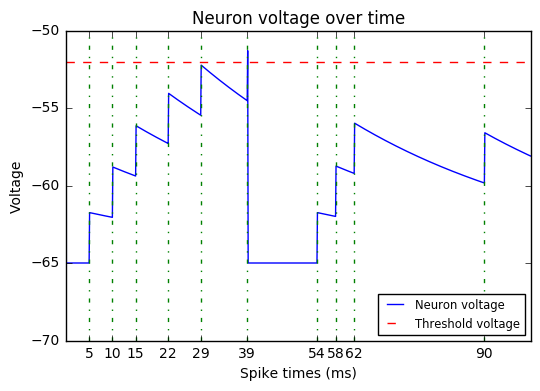

In [29]:
start_scope()

eqs = '''
dv/dt = (-65.0 - v) / tau : 1
I : 1
tau : second
'''

F = SpikeGeneratorGroup(1, array([0] * 10), array([ 5, 10, 15, 22, 29, 39, 54, 58, 62, 90 ]) * ms)
G = NeuronGroup(1, eqs, threshold='v > -52.0', reset='v = -65.0', method='linear')
G.v = 0
S = Synapses(F, G, on_pre='v_post += 3.25')
S.connect(j='i')
G.tau = 50 * ms

M = StateMonitor(G, 'v', record=True)
spikemon = SpikeMonitor(F)

run(100 * ms)

plot(M.t / ms, M.v[0], '-b', label='Neuron voltage')
for spike_time in spikemon.t:
    axvline(spike_time / ms, ls='-.', c='g', lw=1)
axhline(-52.0, ls='--', c='r', lw=1, label='Threshold voltage')
xlabel('Spike times (ms)')
ylabel('Voltage')
ylim([-70, -50])
xticks([ 5, 10, 15, 22, 29, 39, 54, 58, 62, 90 ])
title('Neuron voltage over time')
legend(loc='best', fontsize='small');
savefig('../plots/state_monitor.png')